# Reversal & Continous Pattern


In [29]:
import numpy as np
import pandas as pd
import pandas_ta as ta
from datetime import datetime,timedelta
import plotly.express as px
import plotly.graph_objects as go
import mplfinance as mpf
import matplotlib.pyplot as plt
from head_shoulders import find_hs_patterns, get_pattern_return
# np.version.version
from perceptually_important import find_pips 
from  flags_pennants import find_flags_pennants_trendline, plot_flag
plt.style.use('dark_background')

In [3]:
import vectorbtpro as vbt
vbt.settings.set_theme("dark")

In [4]:
data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day')    
#initialize dataFrame

df = pd.DataFrame(data.get())
# df = df.round(2)
df.index = pd.to_datetime(df.index.date)
data.get()


,Open,High,Low,Close,Volume
datetime,,,,,
2014-03-27 13:30:00+00:00,28.323519,28.323519,27.571549,27.847803,261740.0
2014-03-28 13:30:00+00:00,27.984434,28.245230,27.858275,27.924097,822260.0
2014-03-31 13:30:00+00:00,28.268168,28.273653,27.771509,27.773504,216020.0
2014-04-01 13:30:00+00:00,27.860270,28.345958,27.860270,28.281632,159060.0
2014-04-02 13:30:00+00:00,29.918711,30.160060,28.033801,28.273653,2941860.0
...,...,...,...,...,...
2023-04-12 13:30:00+00:00,107.390000,107.587400,104.970000,105.220000,22761569.0
2023-04-13 13:30:00+00:00,106.470000,108.265000,106.440000,108.190000,21650747.0
2023-04-14 13:30:00+00:00,107.690000,109.580000,107.590000,109.460000,20758686.0


In [5]:
df = pd.DataFrame()
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

trend line 
- gap ห่างกันบางทีลากไม่ได้
- low -> ลากจากจุด low ไปยัง (ยก low)


neurotrader

In [6]:
data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day').get()
data

,Open,High,Low,Close,Volume
datetime,,,,,
2014-03-27 13:30:00+00:00,28.323519,28.323519,27.571549,27.847803,261740.0
2014-03-28 13:30:00+00:00,27.984434,28.245230,27.858275,27.924097,822260.0
2014-03-31 13:30:00+00:00,28.268168,28.273653,27.771509,27.773504,216020.0
2014-04-01 13:30:00+00:00,27.860270,28.345958,27.860270,28.281632,159060.0
2014-04-02 13:30:00+00:00,29.918711,30.160060,28.033801,28.273653,2941860.0
...,...,...,...,...,...
2023-04-12 13:30:00+00:00,107.390000,107.587400,104.970000,105.220000,22761569.0
2023-04-13 13:30:00+00:00,106.470000,108.265000,106.440000,108.190000,21650747.0
2023-04-14 13:30:00+00:00,107.690000,109.580000,107.590000,109.460000,20758686.0


In [31]:
# data = data.loc[(data.index > '2015-01-01') & (data.index <= '2015.12.31')]
data


,close,open,high,low
date,,,,
2018-01-08 02:00:00,9.682558,9.670790,9.686582,9.669485
2018-01-08 03:00:00,9.659442,9.682190,9.682328,9.649524
2018-01-08 04:00:00,9.657575,9.657035,9.670337,9.649206
2018-01-08 05:00:00,9.665797,9.657529,9.674147,9.646951
2018-01-08 06:00:00,9.664886,9.665791,9.669629,9.657441
...,...,...,...,...
2022-12-31 19:00:00,9.715356,9.715815,9.716555,9.715057
2022-12-31 20:00:00,9.715264,9.715356,9.715646,9.714994
2022-12-31 21:00:00,9.714038,9.715240,9.715446,9.713790


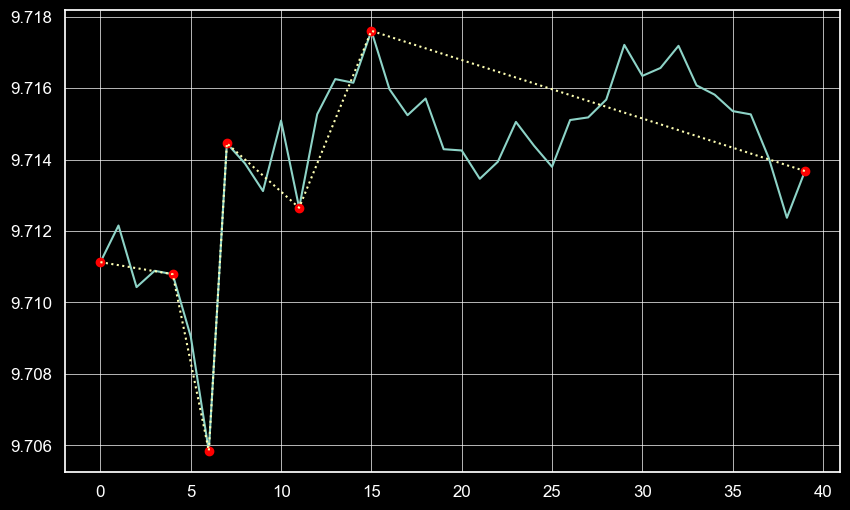

In [33]:
i = len(data)
x = data['close'].iloc[i-40:i].to_numpy()
n_pips = 7
pips_x, pips_y = find_pips(x, n_pips, 2)
pd.Series(x).plot()
for i in range(n_pips):
    plt.plot(pips_x[i], pips_y[i], marker='o', color='red')
plt.plot(pips_x, pips_y, linestyle = 'dotted')
plt.show()

find flag find_flags_pennants_trendline

In [179]:
data = pd.read_csv('BTCUSDT3600.csv')
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')

data = np.log(data)
dat_slice = data['close'].to_numpy()
bull_flags, bear_flags, bull_pennants, bear_pennants  = find_flags_pennants_trendline(dat_slice, 10)

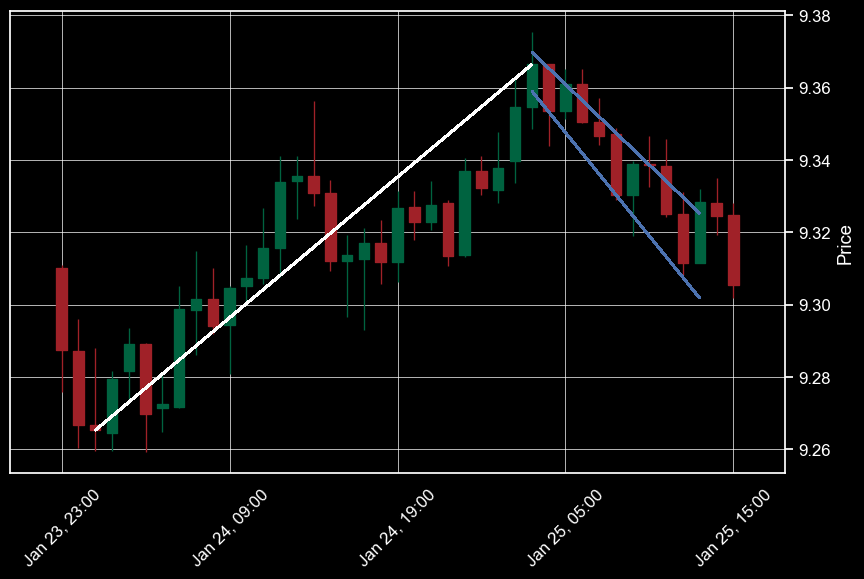

In [10]:
# len(bull_flags)
plot_flag(data, bull_flags[1])
pips_x = [bull_flags[1].base_x, bull_flags[1].tip_x, bull_flags[1].conf_x ]
pips_y = [bull_flags[1].base_y, bull_flags[1].tip_y, bull_flags[1].conf_y ]
x = np.arange(len(data))
coefs = np.polyfit(x, data, 1)
# plt.plot(pips_x, pips_y, linestyle = 'dotted')
# plt.plot(pips_x, pips_y, x,y, x1, y1,linestyle = 'dotted')

FlagPattern(
base_x=383, base_y=9.265238759369101,  
tip_x=409, tip_y=9.366447679362416,   
conf_x=419, conf_y=9.328288300528113,   
pennant=False, flag_width=10, flag_height=0.054841344378456114,  
pole_width=26, pole_height=0.10120891999331505,  
support_intercept=9.3590765381409, support_slope=-0.005731432020040644,  
resist_intercept=9.369864301566853, resist_slope=-0.004462154811281455) 

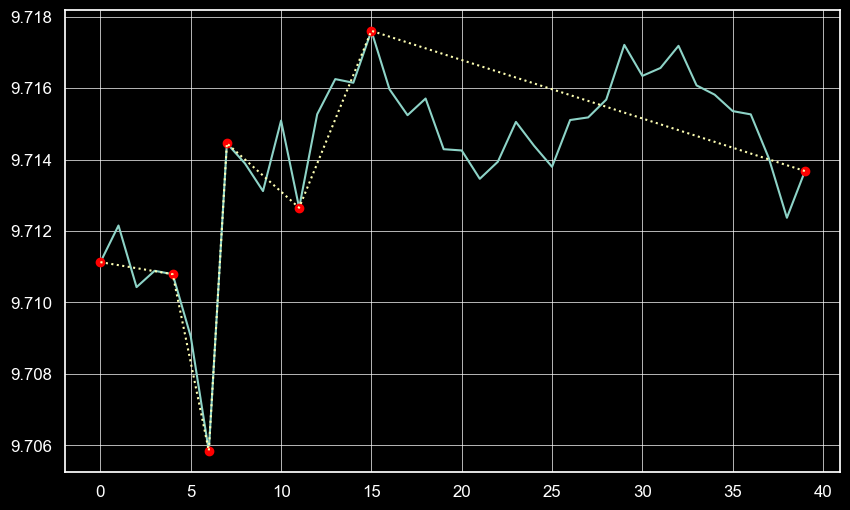

In [11]:
i = len(data)
x = data['close'].iloc[i-40:i].to_numpy()
n_pips = 7
pips_x, pips_y = find_pips(x, n_pips, 2)
pd.Series(x).plot()
for i in range(n_pips):
    plt.plot(pips_x[i], pips_y[i], marker='o', color='red')
plt.plot(pips_x, pips_y, linestyle = 'dotted')
plt.show()

In [164]:
class FlagPattern:
    base_x: int         # Start of the trend index, base of pole
    base_y: float       # Start of trend price

    tip_x: int   = -1       # Tip of pole, start of flag
    tip_y: float = -1.

    conf_x: int   = -1      # Index where pattern is confirmed
    conf_y: float = -1.      # Price where pattern is confirmed

    pennant: bool = False      # True if pennant, false if flag

    flag_width: int    = -1
    flag_height: float = -1.

    pole_width: int    = -1
    pole_height: float = -1.

    # Upper and lower lines for flag, intercept is tip_x
    support_intercept: float = -1.
    support_slope: float = -1.
    resist_intercept: float = -1.
    resist_slope: float = -1.

In [172]:
def cont_pattern(pips_y):
    # --continuation Patterns ---------- pips_y
    upperb = 0 # 1 is bull 0 is bear
    lowerb = 0 # 1 is bull 0 is bear
    if pips_y[0] > pips_y[1]: # coming with bull
        isbull = 1
        high, low = (pips_y[0], pips_y[1])
        for i in range(len(pips_y)):
            if i%2 == 0 and high >= pips_y[i]:
                high = pips_y[i]
            elif i%2 == 0 and high < pips_y[i]: 
                high = pips_y[i]
                upperb = 1 
            if i%2 == 1 and low >= pips_y[i]:
                low = pips_y[i]
            elif i%2 == 1 and low < pips_y[i]:     
                low = pips_y[i]
                lowerb = 1
    else:
        isbull = 0
        low, high = (pips_y[0], pips_y[1])
        for i in range(len(pips_y)):
            if i%2 == 0 and low >= pips_y[i]:
                low = pips_y[i]
            elif i%2 == 0 and low < pips_y[i]: 
                low = pips_y[i]
                upperb = 1 
            if i%2 == 1 and high >= pips_y[i]:
                high = pips_y[i]
            elif i%2 == 1 and high < pips_y[i]:     
                high = pips_y[i]
                lowerb = 1
    if isbull == 0 and upperb == 1 and lowerb == 1:
        print('Rising Wedge - Continuation')
    if isbull == 1 and upperb == 0 and lowerb == 0:
        print('Falling Wedge - Continuation')
    if isbull == 1 and upperb == 1 and lowerb == 1:
        print('Rising Wedge - Reversal Pattern')
    if isbull == 0 and upperb == 0 and lowerb == 0:
        print('Falling Wedge - Reversal Pattern')
    if isbull == 1 and upperb == 0 and lowerb == 1:
        print('Bullish Pennant')
    if isbull == 0 and upperb == 0 and lowerb == 1:
        print('Bearish Pennant')

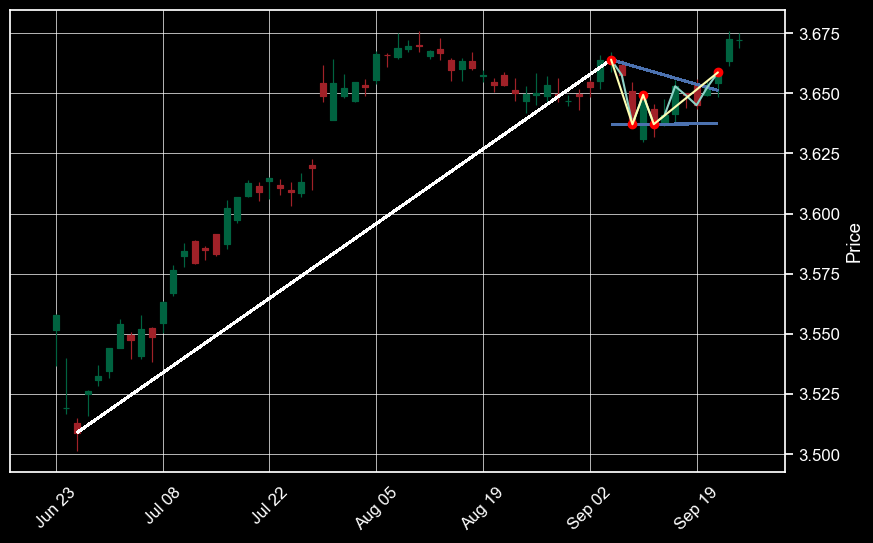

Rising Wedge - Reversal Pattern
[3.66401026 3.63713869 3.6493847  3.63717818 3.65870371]
datetime
2017-10-27 13:30:00+00:00     50.9635
2017-10-30 13:30:00+00:00     50.8555
2017-10-31 13:30:00+00:00     50.8320
2017-11-01 13:30:00+00:00     51.2750
2017-11-02 13:30:00+00:00     51.2790
                               ...   
2023-04-12 13:30:00+00:00    105.2200
2023-04-13 13:30:00+00:00    108.1900
2023-04-14 13:30:00+00:00    109.4600
2023-04-17 13:30:00+00:00    106.4200
2023-04-18 13:30:00+00:00    105.1200
Name: Close, Length: 1367, dtype: float64
profit is 12.152499999999996
                               Open      High       Low     Close     Volume
datetime                                                                    
2014-03-27 13:30:00+00:00  3.343693  3.343693  3.316784  3.326754  12.475107
2014-03-28 13:30:00+00:00  3.331648  3.340925  3.327130  3.329490  13.619812
2014-03-31 13:30:00+00:00  3.341736  3.341930  3.324011  3.324082  12.283126
2014-04-01 13:30:00+00:00  3

In [199]:
# data = pd.read_csv('BTCUSDT3600.csv')
data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day').get()    

# data['datetime'] = data['datetime'].astype('datetime64[s]')
# data = data.set_index('datetime')

data = np.log(data)
dat_slice = data['Close'].to_numpy()
bull_flags, bear_flags, bull_pennants, bear_pennants  = find_flags_pennants_trendline(dat_slice, 10)
def plot_flag(candle_data: pd.DataFrame, pattern: FlagPattern, pad=2, n_pips=5,
              dist_measure=2):
    if pad < 0:
        pad = 0

    start_i = pattern.base_x - pad
    end_i = pattern.conf_x + 1 + pad
    dat = candle_data.iloc[start_i:end_i]
    idx = dat.index
    plt.style.use('dark_background')
    fig = plt.gcf()
    ax = fig.gca()
    tip_idx = idx[pattern.tip_x - start_i]
    conf_idx = idx[pattern.conf_x - start_i]

    pole_line = [(idx[pattern.base_x - start_i], pattern.base_y), (tip_idx, pattern.tip_y)]
    upper_line = [(tip_idx, pattern.resist_intercept), (conf_idx, pattern.resist_intercept + pattern.resist_slope * pattern.flag_width)]
    lower_line = [(tip_idx, pattern.support_intercept), (conf_idx, pattern.support_intercept + pattern.support_slope * pattern.flag_width)]

    mpf.plot(dat, alines=dict(alines=[pole_line, upper_line, lower_line], colors=['w', 'b', 'b']), type='candle', style='charles', ax=ax)

    # ---------find_pips-----------------
    # dist_measure
    # 1 = Euclidean Distance
    # 2 = Perpindicular Distance
    # 3 = Vertical Distance
    # initial DataFrame 
    x = pd.DataFrame({'close' : candle_data['Close'], 
                      'idx' : [ i for i in range(len(candle_data)) ] })
    x_num = x['close'].iloc[pattern.tip_x:pattern.conf_x + 1].to_numpy()
    x_idx = x['idx'].iloc[pattern.tip_x - start_i:pattern.conf_x - start_i + 1].to_numpy()
    pips_x, pips_y = find_pips(x_num, n_pips, dist_measure)
    pips_x = [i + pattern.tip_x - start_i for i in pips_x]
    plt.plot(x_idx, x_num)
    for i in range(n_pips):
        plt.plot(pips_x[i], pips_y[i], marker='o', color='red')
    plt.plot(pips_x, pips_y)
    plt.show()
    
    cont_pattern(pips_y)

    pips_y = np.array(pips_y)
    print(pips_y)
    candle_data = np.exp(candle_data)
    tmp = candle_data.iloc[pattern.conf_x:] 
    #check state which is bull flag or bear flag 
    exit = tmp.loc[tmp['Close'] >= 1.30 * np.exp(pips_y)[-1]]['Close']#.iloc[0]
    print(exit)
    entry = np.exp(pips_y[-1])
    # print(tmp.loc[tmp['close'] >= 1.30 * pips_y[-1]])
    print('profit is',exit.iloc[0] - entry)
    candle_data = np.log(candle_data)
    print(candle_data)
# bull_pennants
plot_flag(data, bull_pennants[1], n_pips = 5)

In [174]:
# fig = go.Figure(data=[go.Candlestick(x=data.index,
#                 open=data['open'],
#                 high=data['high'],
#                 low=data['low'],
#                 close=data['close'])])

# fig.show()
# data

In [ ]:
data = pd.read_csv('BTCUSDT3600.csv')
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')

In [182]:
data.iloc[409:]
# 1. buy now ! 2. breakout and wait buy at retest 3. still going
# if bullish price > price

,close,open,high,low
date,,,,
2018-01-25 03:00:00,9.366448,9.354670,9.375324,9.348641
2018-01-25 04:00:00,9.353614,9.366654,9.366654,9.343972
2018-01-25 05:00:00,9.360947,9.353696,9.365048,9.351463
2018-01-25 06:00:00,9.350385,9.360971,9.365242,9.350127
2018-01-25 07:00:00,9.346634,9.350426,9.357039,9.344036
...,...,...,...,...
2022-12-31 19:00:00,9.715356,9.715815,9.716555,9.715057
2022-12-31 20:00:00,9.715264,9.715356,9.715646,9.714994
2022-12-31 21:00:00,9.714038,9.715240,9.715446,9.713790
